In [1]:
!pip install shap
!pip install importlib
!pip install lifelines
!pip install plotly

     |████████████████████████████████| 276kB 1.4MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394122 sha256=2aa13e5e6e00efe6a558b13ae9ef1f599fee5bbd9f229eb77a919a39f4b15ca8
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap
  Created wheel for importlib: filename=importlib-1.0.4-cp36-none-any.whl size=5858 sha256=b8a246c6714accc6ee3649e133411649f327d4059aa1cac6a278e13fdac9f0d4
  Stored in directory: /root/.cache/pip/wheels/26/eb/96/a8a055637794153edb35b7f7f97de528350367d42d8829c187
Successfully built importlib
     |████████████████████████████████| 419kB 1.4MB/s 


In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [3]:
!git clone https://github.com/gowun/MABTest.git

Cloning into 'MABTest'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 40 (delta 20), reused 34 (delta 14), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [0]:
from MABTest import TS as ts
from MABTest import BayesUCB as bucb
from MABTest import UCB1 as ucb1
from MABTest import UCBtune as ucbt
from MABTest import simulator as sim

In [0]:
import os
import time
import pickle
import datetime
import matplotlib.pyplot as plt
import multiprocessing

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10 1000
10 1000
10 1000
10 1000
10 1000
10 1000
10 1000
10 1000
10 1000
20 1000
20 1000
20 1000
20 1000
20 1000
20 1000
20 1000
20 1000
20 1000
20 1000
30 1000
30 1000
40 1000
40 1000
30 1000
30 1000
30 1000
30 1000
30 1000
30 1000
30 1000
50 1000
50 1000
30 1000
40 1000
40 1000
60 1000
60 1000
40 1000
40 1000
40 1000
40 1000
40 1000
50 1000
40 1000
50 1000
70 1000
70 1000
50 1000
50 1000
50 1000
50 1000
60 1000
50 1000
50 1000
60 1000
80 1000
80 1000
60 1000
60 1000
60 1000
60 1000
70 1000
60 1000
60 1000
70 1000
90 1000
90 1000
80 1000
70 1000
70 1000
70 1000
70 1000
70 1000
70 1000
80 1000
100 1000
100 1000
80 1000
80 1000
80 1000
90 1000
80 1000
80 1000
90 1000
80 1000
110 1000
110 1000
90 1000
90 1000
90 1000
90 1000
100 1000
90 1000
90 1000
100 1000
120 1000
120 1000
100 1000
100 1000
100 1000
110 1000
100 1000
100 1000
100 1000
110 1000
130 1000
130 1000
110 1000
110 1000
110 1000
120 1000
110 1000
110 1000
110 1000
120 1000
140 1000
140 1000


Text(0, 0.5, 'regret')

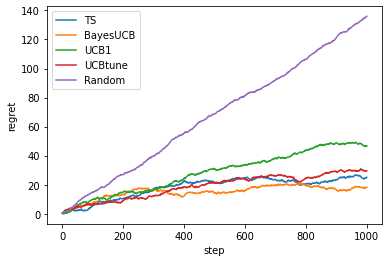

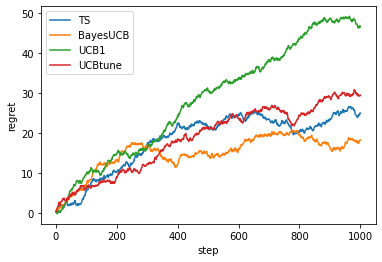

In [6]:
#start_time = time.time()
posProb = [1.0]
itemProb = [0.45, 0.44, 0.40, 0.25, 0.05]
K = len(itemProb)
L = len(posProb)
itemid = [i for i in range(K)]

expCount = 50
stepCount = 1000
sm = sim.Simulator(itemid, posProb, itemProb)
log_fname='log/'+datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S.')

with multiprocessing.Pool(10) as p:
  exp_result = p.map(sm.run, [{'step_cnt':stepCount, 'log_fname':log_fname} for _ in range(expCount)])
base = exp_result[0][0]
plots = sum([i for _, i in exp_result])
plots = plots / float(expCount)

labels = ['TS', 'BayesUCB', 'UCB1', 'UCBtune', 'Random']
plt.figure()
for i in range(len(labels)):
  plt.plot(base, list(plots[i]), label=labels[i])
plt.legend()
plt.xlabel('step')
plt.ylabel('regret')

plt.figure()
for i in range(len(labels)-1):
  plt.plot(base, list(plots[i]), label=labels[i])
plt.legend()
plt.xlabel('step')
plt.ylabel('regret')